<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/SNiDL_home_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

## 1. Dividing by digits: 0-2, 3-5, and 5-9 (vertical slicing – by columns)

### Load data and divide them -> train for each model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

x = x.reshape(x.shape[0], -1)

scaler = StandardScaler()
x = scaler.fit_transform(x)


x_1 = x[(y >= 0) & (y <= 2)]
y_1 = y[(y >= 0) & (y <= 2)]

x_2 = x[(y >= 3) & (y <= 5)]
y_2 = y[(y >= 3) & (y <= 5)]

x_3 = x[(y >= 6) & (y <= 9)]
y_3 = y[(y >= 6) & (y <= 9)]

data = [
    {"x": x_1, "y": y_1},
    {"x": x_2, "y": y_2},
    {"x": x_3, "y": y_3},
]

results = []
models = []

for dataset in data:
  model = SGDClassifier(random_state=42, verbose=0)
  X_train, X_test, y_train, y_test = train_test_split(
  dataset["x"], dataset["y"], test_size=0.3, random_state=42)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  models.append(model)

  results.append({"precision": precision_score(y_test, y_pred, average='macro'),
                  "recall": recall_score(y_test, y_pred, average='macro'),
                  "confusion_matrix": confusion_matrix(y_test, y_pred)})

In [ ]:
results

[{'precision': 0.9850135080749497,
  'recall': 0.9853094440444017,
  'confusion_matrix': array([[2069,    3,   28],
         [   0, 2315,   35],
         [  20,   10, 2051]])},
 {'precision': 0.954668947285566,
  'recall': 0.9547032437163393,
  'confusion_matrix': array([[2023,    7,  104],
         [  25, 1998,   22],
         [  86,   30, 1789]])},
 {'precision': 0.9536106635460166,
  'recall': 0.953607395557265,
  'confusion_matrix': array([[2043,    2,   43,    0],
         [   3, 2026,   44,   97],
         [  14,   11, 1998,   31],
         [   1,   79,   66, 1928]])}]

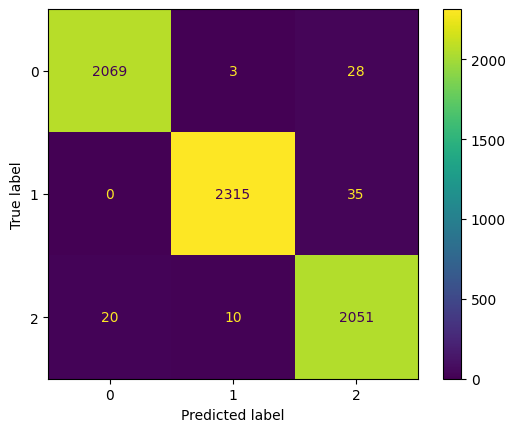

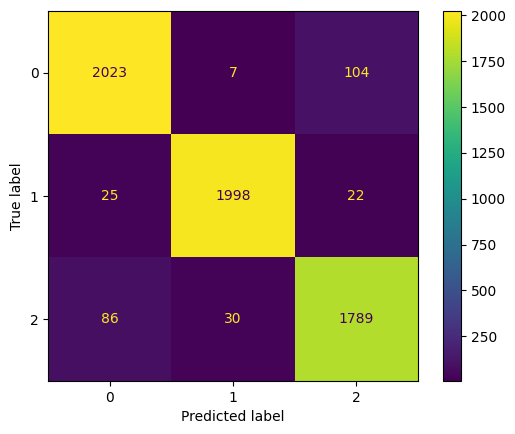

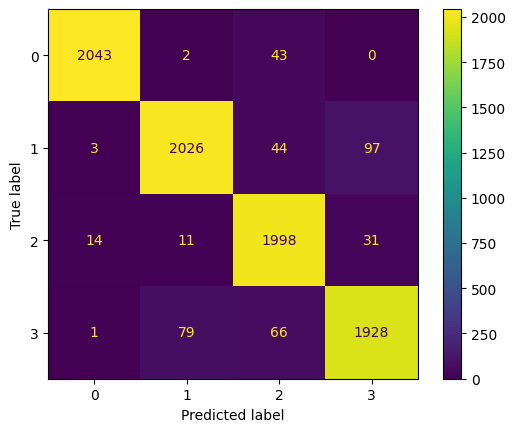

In [ ]:
for res in results:
    ConfusionMatrixDisplay(res["confusion_matrix"]).plot()

### Collect global coefficients

In [ ]:
global_coef = []
global_intercept = []

for local_model in models:
      global_coef.extend(local_model.coef_)
      global_intercept.extend(local_model.intercept_)

global_coef = np.array(global_coef)
global_intercept = np.array(global_intercept)

### Inject calculated coeffiecients and intercept into new dummy model

In [ ]:
global_model = SGDClassifier(random_state=42, verbose=0, max_iter=1)

X_train, X_test, y_train, y_test = train_test_split(
  x, y, test_size=0.3, random_state=42)

global_model.fit(X_train, y_train) # <- dummy model
global_model.coef_ = global_coef
global_model.intercept_ = global_intercept

y_pred = global_model.predict(X_test)

global_result = {"precision": precision_score(y_test, y_pred, average='macro'),
                  "recall": recall_score(y_test, y_pred, average='macro'),
                  "confusion_matrix": confusion_matrix(y_test, y_pred)}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Final results

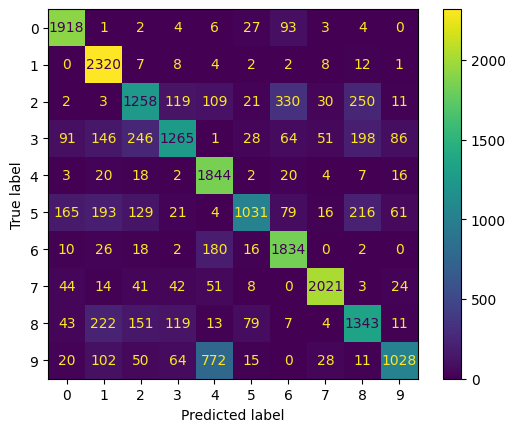

In [ ]:
global_result
ConfusionMatrixDisplay(global_result["confusion_matrix"]).plot()

## 2. Dividing by writers (horizontal slicing – by rows)

### Divide data by rows -> train for each model

In [ ]:
X_train, x_1, y_train, y_1 = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)
x_2, x_3, y_2, y_3 = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)

data = [
    {"x": x_1, "y": y_1},
    {"x": x_2, "y": y_2},
    {"x": x_3, "y": y_3},
]

results = []

params = []

for dataset in data:
  model = SGDClassifier(random_state=42, verbose=0)
  X_train, X_test, y_train, y_test = train_test_split(
  dataset["x"], dataset["y"], test_size=0.3, random_state=42)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  results.append({"precision": precision_score(y_test, y_pred, average='macro'),
                  "recall": recall_score(y_test, y_pred, average='macro'),
                  "confusion_matrix": confusion_matrix(y_test, y_pred)})

  params.append({'coef_': model.coef_,
                 'intercept': model.intercept_})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
results

[{'precision': 0.9057148662506043,
  'recall': 0.9028472582074138,
  'confusion_matrix': array([[637,   0,   3,   0,   2,   2,   9,   1,  11,   1],
         [  0, 721,   2,   2,   0,   4,   0,   2,  19,   1],
         [  4,   2, 608,   9,  14,   3,  11,   4,  34,   2],
         [  4,   1,  16, 631,   1,  24,   7,   5,  20,   8],
         [  1,   5,   9,   1, 584,   0,   8,   0,  23,  30],
         [  2,   4,   2,  21,   2, 521,   9,   3,  37,  14],
         [  7,   3,   4,   0,   5,  10, 681,   1,  18,   0],
         [  3,   4,  10,   4,   7,   3,   0, 658,   9,  34],
         [  4,   8,   6,  18,   1,  18,   4,   1, 598,   7],
         [  2,   5,   3,  10,  14,   3,   1,  19,  21, 625]])},
 {'precision': 0.9019216640466171,
  'recall': 0.8988419003534636,
  'confusion_matrix': array([[688,   0,   3,   1,   1,   9,   9,   0,  20,   0],
         [  0, 712,   4,   3,   1,   3,   1,   1,  13,   2],
         [  5,   2, 597,  11,   7,   1,  11,   8,  31,   1],
         [  0,   4,  24, 641, 

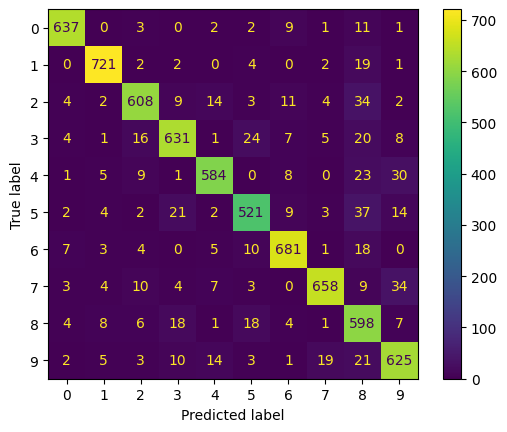

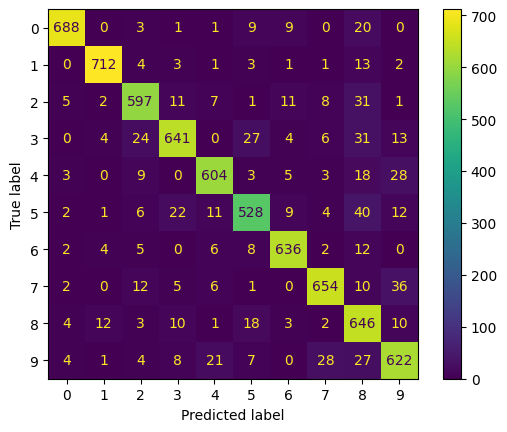

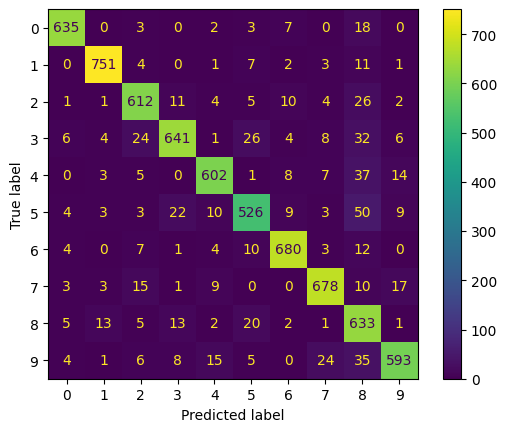

In [ ]:
for res in results:
    ConfusionMatrixDisplay(res["confusion_matrix"]).plot()

### Calculate avg coefficients (note - here we had to calculate average because each model was trained for all 10 classes)

In [ ]:
coefs = (params[0]["coef_"]+params[1]["coef_"]+params[2]["coef_"])/3
intercepts = (params[0]["intercept"]+params[1]["intercept"]+params[2]["intercept"])/3

### Inject calculated coeffiecients and intercept into new dummy model

In [ ]:
sgd = SGDClassifier(random_state=42, verbose=0)
sgd.coef_ = coefs
sgd.intercept_ = intercepts
sgd.classes_ = np.unique(y_1)

### Results

Precisison: 0.9160036711287669
Recall: 0.9123773683553162
[[2176    0    5    3    4   16   14    3   56    1]
 [   0 2508   11    6    2   16    4    5   43    4]
 [  13   11 2085   24   28    8   30   14   91    3]
 [  12   10   49 2054    2   82    7   19   99   23]
 [   5    9   12    7 2042    0   15    6   74   82]
 [  16    6   10   66   17 1756   30   15  131   36]
 [  11    6   15    0   18   26 2149    2   42    0]
 [   9   10   26   10   16    3    1 2224   43   65]
 [  11   24   17   28    1   43    9    2 2099   18]
 [  10   14   14   27   52   16    1   58   94 2010]]


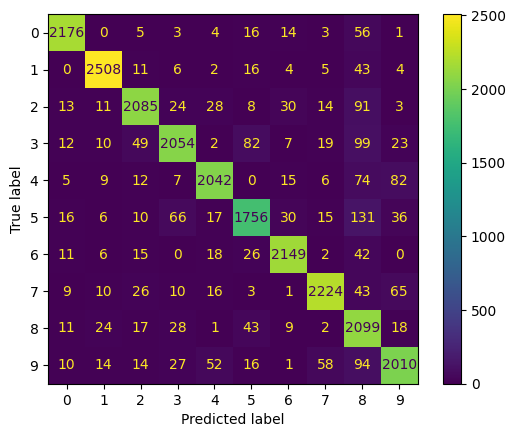

In [ ]:
y_pred = sgd.predict(x_1)

print(f"Precisison: {precision_score(y_1, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_1, y_pred, average='macro')}")
cm = confusion_matrix(y_1, y_pred)
print(confusion_matrix(y_1, y_pred))

ConfusionMatrixDisplay(cm).plot()

## Whole dataset

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9071364368309686
0.90195483450963
[[2171    0    7    2    4   11   13    3   66    1]
 [   0 2494   18    6    2   17    5    5   48    4]
 [  14   12 2065   37   32    6   28   18   88    7]
 [  16   13   57 2019    3   79    5   21  122   22]
 [   4    9   20    6 1997    3   17   12  100   84]
 [  16   11   16   66   18 1710   32   17  164   33]
 [  14    4   18    0   18   24 2138    4   49    0]
 [   9    9   35   10   18    3    0 2222   45   56]
 [  14   25   22   31    0   43   12    2 2085   18]
 [  10   13   22   29   61   15    1   71  108 1966]]


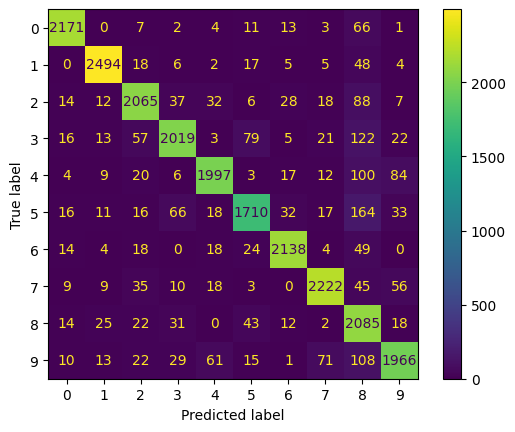

In [ ]:
model_global = SGDClassifier(random_state=42, verbose=0)

model_global.fit(X_train, y_train)

y_pred_gobal = model_global.predict(x_1)
print(precision_score(y_1, y_pred_gobal, average='macro'))
print(recall_score(y_1, y_pred_gobal, average='macro'))
cm = confusion_matrix(y_1, y_pred_gobal)
print(cm)

ConfusionMatrixDisplay(cm).plot()